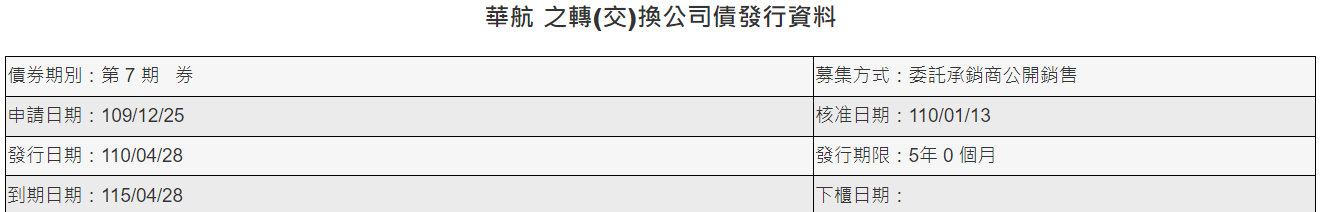
---
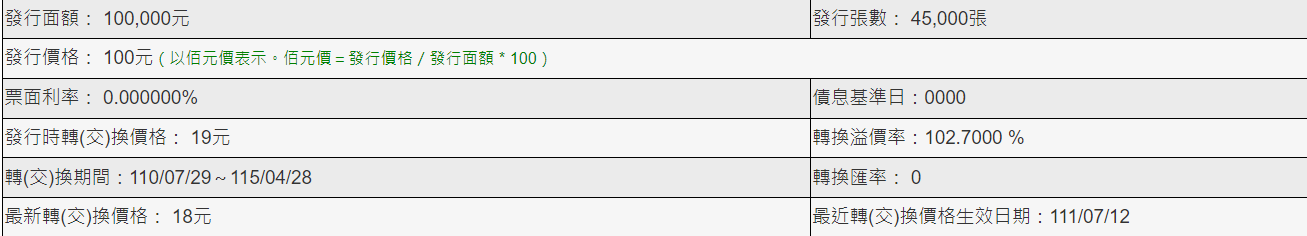

*   R: 轉換比率
*   δ: delta 值

*   γ: Gamma 值
*   δ * γ 為放空比例







In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

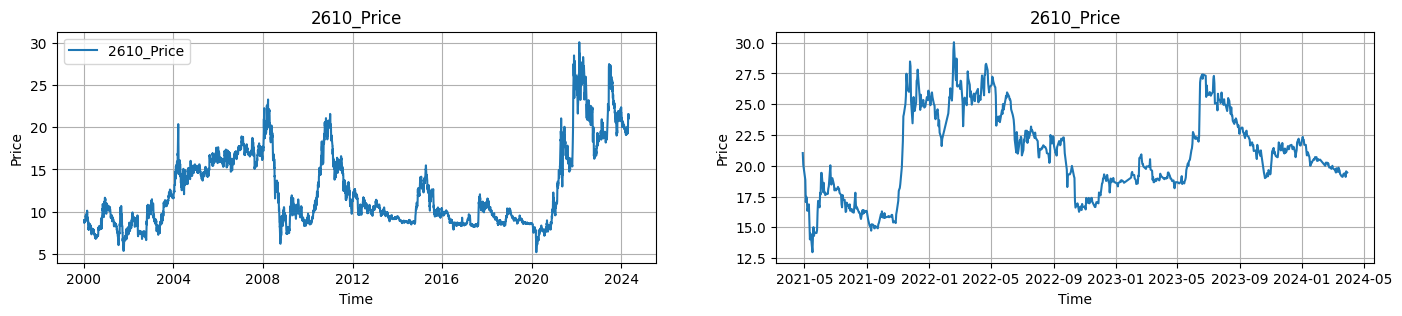

In [ ]:
# 获取股票数据
df_stock = yf.Ticker('2610.TW')  # 華航的股票代码是2610，'.TW'表示台湾市场
df_stock_data_max = df_stock.history(period="max")  # 获取历史股价数据

start_date = '2021-04-28'
end_date = '2024-03-31'

stock = df_stock.history(start=start_date, end=end_date)  # 获取历史股价数据
# 绘制股价线图
plt.figure(figsize=(17, 3))
plt.subplot(1, 2, 1)
plt.plot(df_stock_data_max.index, df_stock_data_max['Close'], label='2610_Price')
plt.title('2610_Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(stock.index, stock['Close'], label='5388_Price')
plt.title('2610_Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)

plt.show()


In [ ]:
# 计算每日收益率
stock['Daily_Return'] = stock['Close'].pct_change()

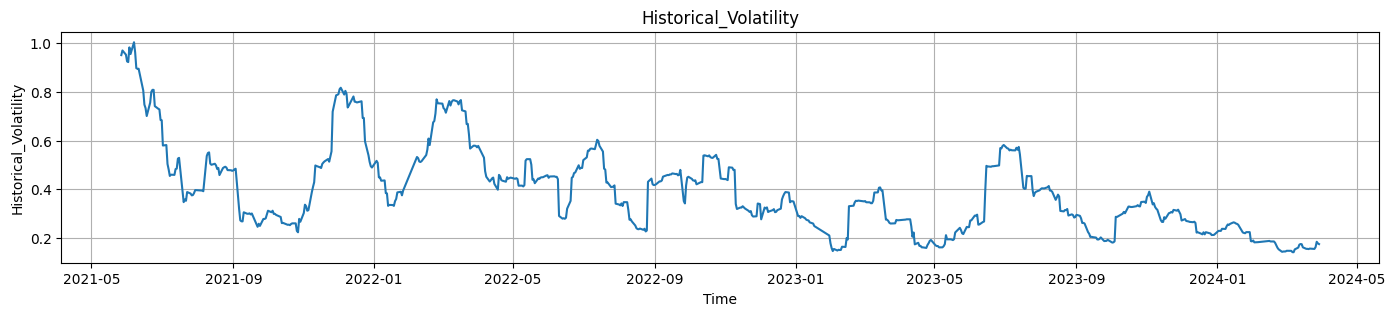

In [ ]:
# 计算历史波动率（以20个交易日为窗口）
stock['Historical_Volatility'] = stock['Daily_Return'].rolling(window=20).std() * (252**0.5)

plt.figure(figsize=(17, 3))
plt.plot(stock.index, stock['Historical_Volatility'])
plt.title('Historical_Volatility')
plt.xlabel('Time')
plt.ylabel('Historical_Volatility')
plt.grid(True)
plt.show()

In [ ]:
stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily_Return,Historical_Volatility
Date,,,,,,,,,
2021-04-28 00:00:00+08:00,20.039281,21.507882,19.991907,21.034140,365519341,0.0,0.0,NaN,NaN
2021-04-29 00:00:00+08:00,21.413133,21.602629,19.755037,20.086657,306498790,0.0,0.0,-0.045045,NaN
2021-05-03 00:00:00+08:00,19.423416,19.849784,18.807552,18.854925,247159336,0.0,0.0,-0.061321,NaN
2021-05-04 00:00:00+08:00,18.902301,19.565538,17.007333,17.054707,378524449,0.0,0.0,-0.095477,NaN
2021-05-05 00:00:00+08:00,17.102080,18.002191,16.201972,17.481075,212587919,0.0,0.0,0.025000,NaN
...,...,...,...,...,...,...,...,...,...
2024-03-25 00:00:00+08:00,19.250000,19.450001,19.250000,19.400000,11752995,0.0,0.0,0.002584,0.155706
2024-03-26 00:00:00+08:00,19.400000,19.450001,19.100000,19.100000,16570493,0.0,0.0,-0.015464,0.163072
2024-03-27 00:00:00+08:00,19.100000,19.600000,19.100000,19.549999,16049068,0.0,0.0,0.023560,0.184957


In [ ]:
stock['Close'][64:147]

Date
2021-07-29 00:00:00+08:00    16.865210
2021-07-30 00:00:00+08:00    16.344095
2021-08-02 00:00:00+08:00    16.486216
2021-08-03 00:00:00+08:00    16.249346
2021-08-04 00:00:00+08:00    16.249346
                               ...    
2021-11-19 00:00:00+08:00    26.197926
2021-11-22 00:00:00+08:00    26.008429
2021-11-23 00:00:00+08:00    26.292673
2021-11-24 00:00:00+08:00    28.471884
2021-11-25 00:00:00+08:00    28.092892
Name: Close, Length: 83, dtype: float64

In [ ]:
stock['Close'][123:147]

Date
2021-10-25 00:00:00+08:00    15.491359
2021-10-26 00:00:00+08:00    15.396610
2021-10-27 00:00:00+08:00    15.349236
2021-10-28 00:00:00+08:00    16.059849
2021-10-29 00:00:00+08:00    16.296721
2021-11-01 00:00:00+08:00    17.149454
2021-11-02 00:00:00+08:00    17.954817
2021-11-03 00:00:00+08:00    18.096939
2021-11-04 00:00:00+08:00    18.191687
2021-11-05 00:00:00+08:00    18.523306
2021-11-08 00:00:00+08:00    19.897158
2021-11-09 00:00:00+08:00    20.892014
2021-11-10 00:00:00+08:00    21.981623
2021-11-11 00:00:00+08:00    24.018713
2021-11-12 00:00:00+08:00    24.208208
2021-11-15 00:00:00+08:00    25.013571
2021-11-16 00:00:00+08:00    25.676807
2021-11-17 00:00:00+08:00    27.477028
2021-11-18 00:00:00+08:00    26.861162
2021-11-19 00:00:00+08:00    26.197926
2021-11-22 00:00:00+08:00    26.008429
2021-11-23 00:00:00+08:00    26.292673
2021-11-24 00:00:00+08:00    28.471884
2021-11-25 00:00:00+08:00    28.092892
Name: Close, dtype: float64

In [ ]:
stock['Close'][489:552]

Date
2023-05-02 00:00:00+08:00    18.666889
2023-05-03 00:00:00+08:00    18.617765
2023-05-04 00:00:00+08:00    18.617765
2023-05-05 00:00:00+08:00    18.568642
2023-05-08 00:00:00+08:00    18.666889
                               ...    
2023-07-25 00:00:00+08:00    25.100000
2023-07-26 00:00:00+08:00    25.150000
2023-07-27 00:00:00+08:00    25.950001
2023-07-28 00:00:00+08:00    25.450001
2023-07-31 00:00:00+08:00    24.950001
Name: Close, Length: 63, dtype: float64

In [ ]:
stock['Close'][552:610]

Date
2023-08-01 00:00:00+08:00    25.400000
2023-08-02 00:00:00+08:00    25.000000
2023-08-04 00:00:00+08:00    24.950001
2023-08-07 00:00:00+08:00    24.450001
2023-08-08 00:00:00+08:00    24.900000
2023-08-09 00:00:00+08:00    25.500000
2023-08-10 00:00:00+08:00    25.150000
2023-08-11 00:00:00+08:00    25.299999
2023-08-14 00:00:00+08:00    24.200001
2023-08-15 00:00:00+08:00    24.750000
2023-08-16 00:00:00+08:00    24.100000
2023-08-17 00:00:00+08:00    24.100000
2023-08-18 00:00:00+08:00    23.650000
2023-08-21 00:00:00+08:00    23.400000
2023-08-22 00:00:00+08:00    23.700001
2023-08-23 00:00:00+08:00    23.549999
2023-08-24 00:00:00+08:00    23.850000
2023-08-25 00:00:00+08:00    23.750000
2023-08-28 00:00:00+08:00    23.150000
2023-08-29 00:00:00+08:00    23.299999
2023-08-30 00:00:00+08:00    23.049999
2023-08-31 00:00:00+08:00    22.600000
2023-09-01 00:00:00+08:00    22.950001
2023-09-04 00:00:00+08:00    23.100000
2023-09-05 00:00:00+08:00    23.049999
2023-09-06 00:00:00+

In [ ]:
stock['Close'][418:472]

Date
2023-01-03 00:00:00+08:00    18.568642
2023-01-04 00:00:00+08:00    18.470394
2023-01-05 00:00:00+08:00    18.323025
2023-01-06 00:00:00+08:00    18.617765
2023-01-09 00:00:00+08:00    18.666889
2023-01-10 00:00:00+08:00    18.765137
2023-01-11 00:00:00+08:00    18.814259
2023-01-12 00:00:00+08:00    18.716011
2023-01-13 00:00:00+08:00    18.814259
2023-01-16 00:00:00+08:00    18.716011
2023-01-17 00:00:00+08:00    18.617765
2023-01-30 00:00:00+08:00    19.010754
2023-01-31 00:00:00+08:00    19.059875
2023-02-01 00:00:00+08:00    19.403740
2023-02-02 00:00:00+08:00    19.501987
2023-02-03 00:00:00+08:00    19.256371
2023-02-06 00:00:00+08:00    19.256371
2023-02-07 00:00:00+08:00    18.961628
2023-02-08 00:00:00+08:00    18.912506
2023-02-09 00:00:00+08:00    18.863382
2023-02-10 00:00:00+08:00    18.519520
2023-02-13 00:00:00+08:00    18.568642
2023-02-14 00:00:00+08:00    19.207245
2023-02-15 00:00:00+08:00    19.158123
2023-02-16 00:00:00+08:00    20.631824
2023-02-17 00:00:00+

# Raise :

*   2021/7/29 to 2021/11/25
*   2021/10/25 to 2021/11/25
*   2023/5/2/ to 2023/7/31

# Fall :

*   2023/8/1 to 2023/10/25

# Consolidation / Range Trend :

*   2023/1/3/ to 2023/3/31







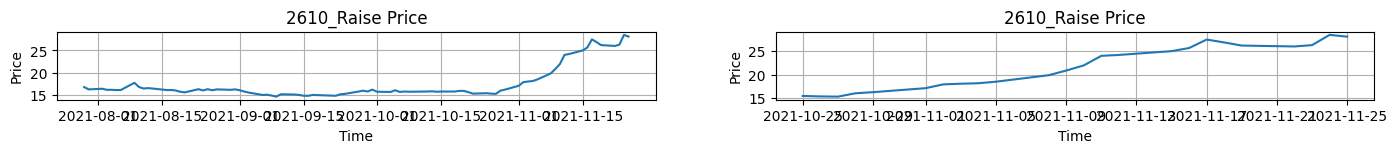

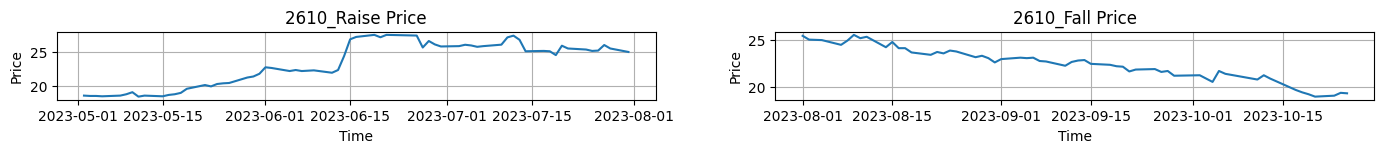

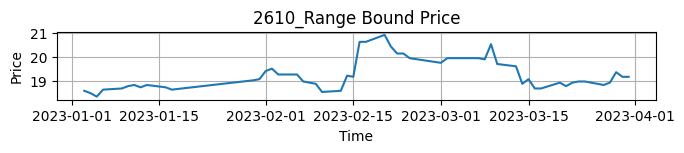

In [ ]:
# 準備時間範圍內的每一天日期
start_date_deltar1 = '2021-07-29'
end_date_deltar1 = '2021-11-26'
start_date_deltar2 = '2021-10-25'
end_date_deltar2 = '2021-11-26'
start_date_deltar3 = '2023-05-02'
end_date_deltar3 = '2023-08-01'
start_date_deltaf1 = '2023-08-01'
end_date_deltaf1 = '2023-10-26'
start_date_deltac1 = '2023-1-3'
end_date_deltac1 = '2023-04-01'

stock_data_deltar1 = df_stock.history(start=start_date_deltar1, end=end_date_deltar1)  # 获取历史股价数据
stock_data_deltar2 = df_stock.history(start=start_date_deltar2, end=end_date_deltar2)
stock_data_deltar3 = df_stock.history(start=start_date_deltar3, end=end_date_deltar3)
stock_data_deltaf1 = df_stock.history(start=start_date_deltaf1, end=end_date_deltaf1)
stock_data_deltac1 = df_stock.history(start=start_date_deltac1, end=end_date_deltac1)
K = 18.0  # 行使價格
r = 0.0122  # 無風險利率
c_p = ' c '
R = 100 / 18
# plot
plt.figure(figsize=(17, 3))
plt.subplot(3, 2, 1)
plt.plot(stock_data_deltar1.index, stock_data_deltar1['Close'], label='5388_Price')
plt.title('2610_Raise Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(stock_data_deltar2.index, stock_data_deltar2['Close'], label='5388_Price')
plt.title('2610_Raise Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.show()
plt.figure(figsize=(17, 3))
plt.subplot(3, 2, 3)
plt.plot(stock_data_deltar3.index, stock_data_deltar3['Close'], label='5388_Price')
plt.title('2610_Raise Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(stock_data_deltaf1.index, stock_data_deltaf1['Close'], label='5388_Price')
plt.title('2610_Fall Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.figure(figsize=(17, 3))
plt.subplot(3, 2, 5)
plt.plot(stock_data_deltac1.index, stock_data_deltac1['Close'], label='5388_Price')
plt.title('2610_Range Bound Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)

In [ ]:
from scipy.stats import norm
from numpy import sqrt, log, exp

def d1(S, K, T, sigma, r):
    return (log(S/K) + (r+0.5*sigma**2)*T) / (sigma*sqrt(T))
# 定義Black-Scholes公式的delta計算函數
def calculate_delta(S, K, T, r, sigma, c_p):
  if c_p == ' c ':
    # d1 = (log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    delta = norm.cdf(d1(S, K, T, sigma, r))
    return delta
def Gamma(S, K, T, sigma, r):
    return norm.pdf(d1(S, K, T, sigma, r)) / (S*sigma*sqrt(T))

In [ ]:
# 初始化結果列表
delta_storer1 = []
delta_storer2 = []
delta_storer3 = []
delta_storef1 = []
delta_storec1 = []
gamma_storer1 = []
gamma_storer2 = []
gamma_storer3 = []
gamma_storef1 = []
gamma_storec1 = []
# end date 2026/4/28
for i in range(64,147):
  close_temp = stock['Close'][i]
  historical_volatility_temp = stock['Historical_Volatility'][i]
  count_date = 0
  T = ( 1197 - count_date ) / 252  #
  count_date += 1

  # 計算Delta值
  delta_call = calculate_delta(close_temp, K, T, r, historical_volatility_temp, c_p)
  # delta_store[count_date] = delta_call
  delta_storer1.append(delta_call)
  # 計算Gamma值
  gamma_call = Gamma(close_temp, K, T, historical_volatility_temp, r)
  gamma_storer1.append(gamma_call)

for i in range(123,147):
  close_temp = stock['Close'][i]
  historical_volatility_temp = stock['Historical_Volatility'][i]
  count_date = 0
  T = ( 1134 - count_date ) / 252  #
  count_date += 1

  # 計算Delta值
  delta_call = calculate_delta(close_temp, K, T, r, historical_volatility_temp, c_p)
  # delta_store[count_date] = delta_call
  delta_storer2.append(delta_call)
  # 計算Gamma值
  gamma_call = Gamma(close_temp, K, T, historical_volatility_temp, r)
  gamma_storer2.append(gamma_call)

for i in range(489,552):
  close_temp = stock['Close'][i]
  historical_volatility_temp = stock['Historical_Volatility'][i]
  count_date = 0
  T = ( 756 - count_date ) / 252  #
  count_date += 1

  # 計算Delta值
  delta_call = calculate_delta(close_temp, K, T, r, historical_volatility_temp, c_p)
  # delta_store[count_date] = delta_call
  delta_storer3.append(delta_call)
  # 計算Gamma值
  gamma_call = Gamma(close_temp, K, T, historical_volatility_temp, r)
  gamma_storer3.append(gamma_call)

for i in range(552,610):
  close_temp = stock['Close'][i]
  historical_volatility_temp = stock['Historical_Volatility'][i]
  count_date = 0
  T = ( 693 - count_date ) / 252  #
  count_date += 1

  # 計算Delta值
  delta_call = calculate_delta(close_temp, K, T, r, historical_volatility_temp, c_p)
  # delta_store[count_date] = delta_call
  delta_storef1.append(delta_call)
  # 計算Gamma值
  gamma_call = Gamma(close_temp, K, T, historical_volatility_temp, r)
  gamma_storef1.append(gamma_call)

for i in range(418,472):
  close_temp = stock['Close'][i]
  historical_volatility_temp = stock['Historical_Volatility'][i]
  count_date = 0
  T = ( 840 - count_date ) / 252  #
  count_date += 1

  # 計算Delta值
  delta_call = calculate_delta(close_temp, K, T, r, historical_volatility_temp, c_p)
  # delta_store[count_date] = delta_call
  delta_storec1.append(delta_call)
  # 計算Gamma值
  gamma_call = Gamma(close_temp, K, T, historical_volatility_temp, r)
  gamma_storec1.append(gamma_call)

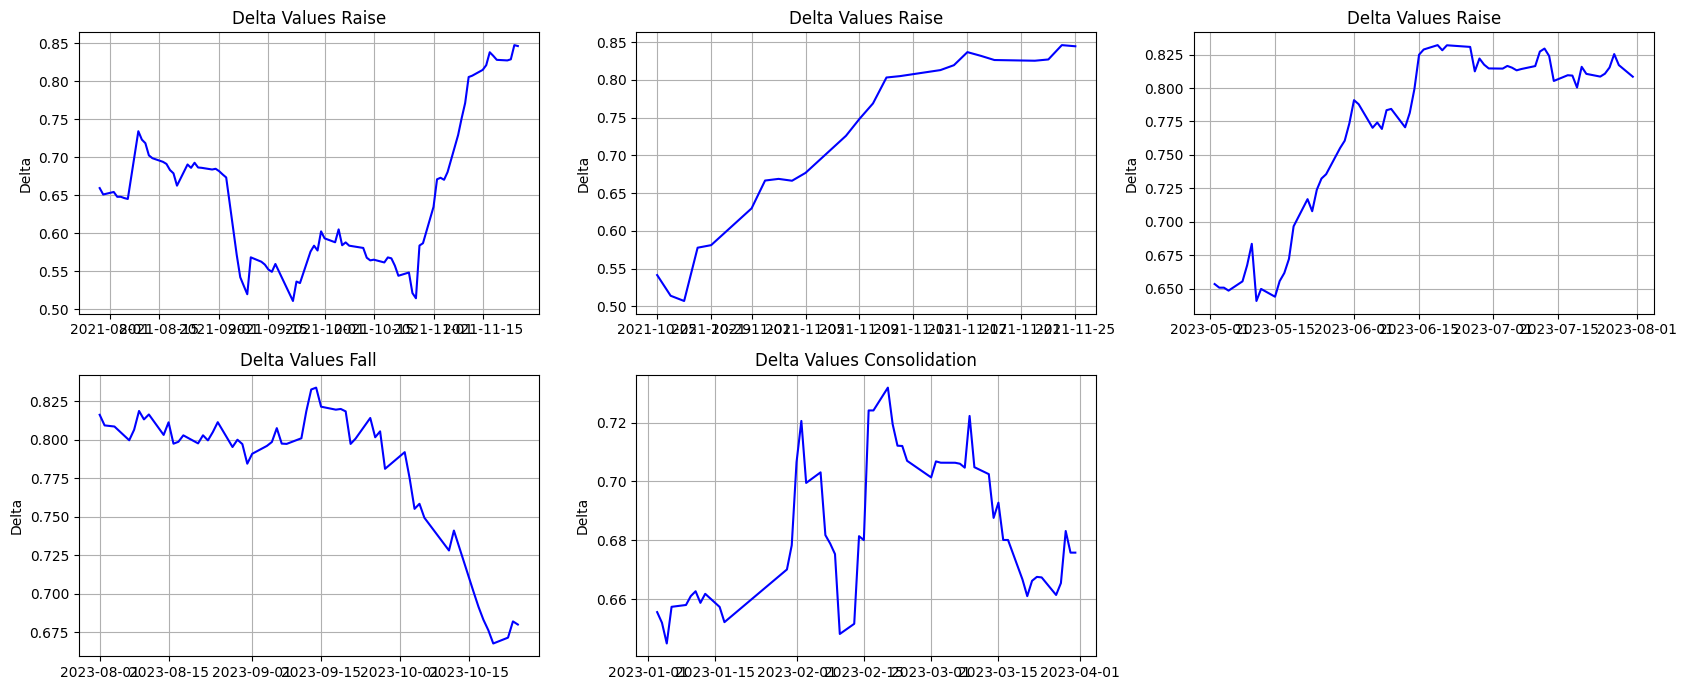

In [ ]:
# 繪製折線圖
plt.figure(figsize=(17, 7))
plt.subplot(2, 3, 1)
plt.plot(stock_data_deltar1.index, delta_storer1, color='blue')
plt.title('Delta Values Raise')
plt.ylabel('Delta')
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(stock_data_deltar2.index, delta_storer2, color='blue')
plt.title('Delta Values Raise')
plt.ylabel('Delta')
plt.grid(True)

plt.subplot(2, 3, 3)
plt.plot(stock_data_deltar3.index, delta_storer3, color='blue')
plt.title('Delta Values Raise')
plt.ylabel('Delta')
plt.grid(True)

plt.subplot(2, 3, 4)
plt.plot(stock_data_deltaf1.index, delta_storef1, color='blue')
plt.title('Delta Values Fall')
plt.ylabel('Delta')
plt.grid(True)

plt.subplot(2, 3, 5)
plt.plot(stock_data_deltac1.index, delta_storec1, color='blue')
plt.title('Delta Values Consolidation')
plt.ylabel('Delta')
plt.grid(True)
plt.tight_layout()

plt.show()

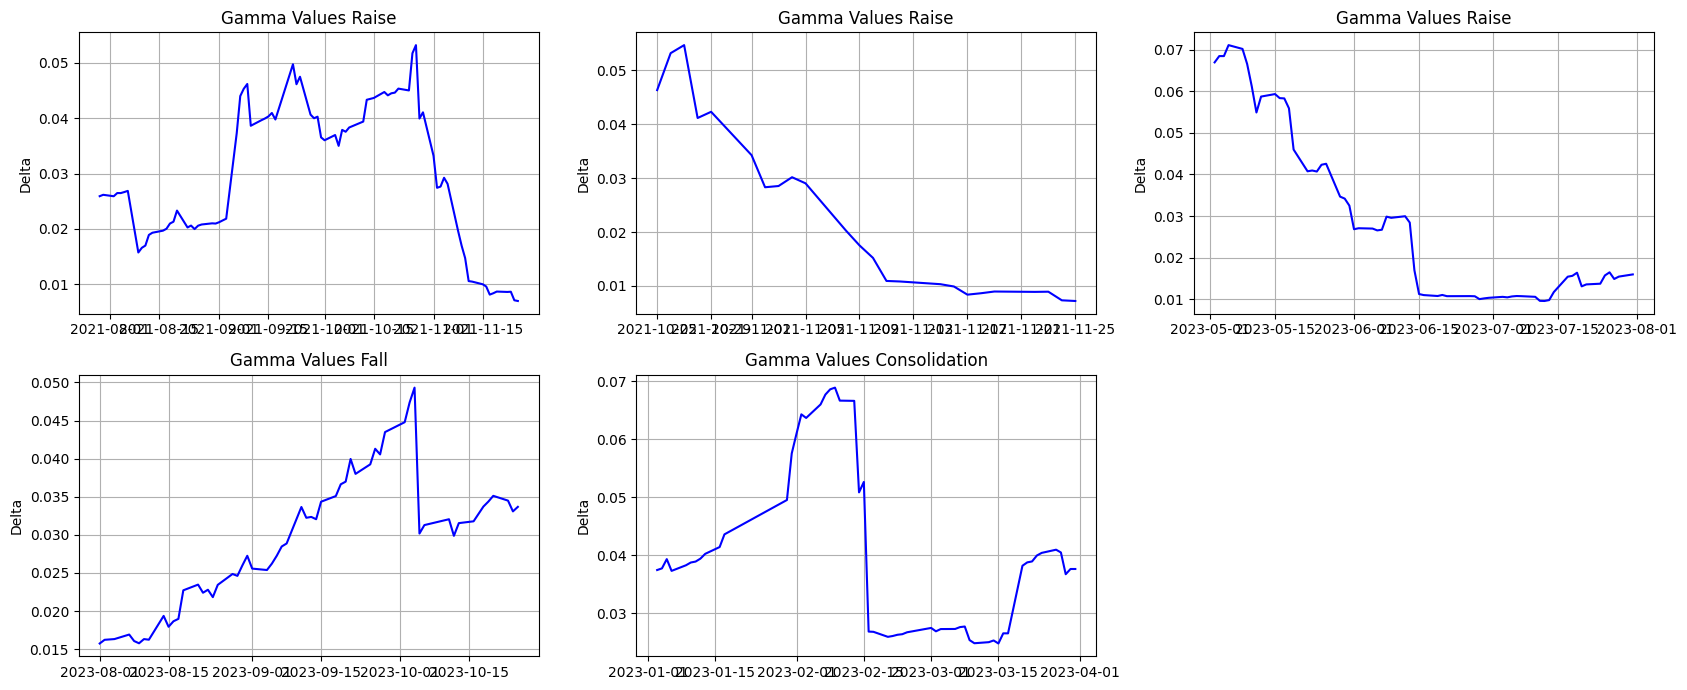

In [ ]:
# 繪製折線圖
plt.figure(figsize=(17, 7))
plt.subplot(2, 3, 1)
plt.plot(stock_data_deltar1.index, gamma_storer1, color='blue')
plt.title('Gamma Values Raise')
plt.ylabel('Delta')
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(stock_data_deltar2.index, gamma_storer2, color='blue')
plt.title('Gamma Values Raise')
plt.ylabel('Delta')
plt.grid(True)

plt.subplot(2, 3, 3)
plt.plot(stock_data_deltar3.index, gamma_storer3, color='blue')
plt.title('Gamma Values Raise')
plt.ylabel('Delta')
plt.grid(True)

plt.subplot(2, 3, 4)
plt.plot(stock_data_deltaf1.index, gamma_storef1, color='blue')
plt.title('Gamma Values Fall')
plt.ylabel('Delta')
plt.grid(True)

plt.subplot(2, 3, 5)
plt.plot(stock_data_deltac1.index, gamma_storec1, color='blue')
plt.title('Gamma Values Consolidation')
plt.ylabel('Delta')
plt.grid(True)
plt.tight_layout()

plt.show()

In [ ]:
# 初始化結果列表
gamma_storer1 = []
gamma_storer2 = []
gamma_storer3 = []
gamma_storef1 = []
gamma_storec1 = []
# end date 2026/4/28
for i in range(64,147):
  close_temp = stock['Close'][i]
  historical_volatility_temp = stock['Historical_Volatility'][i]
  count_date = 0
  T = ( 1197 - count_date ) / 252  #
  count_date += 1

  # 計算Gamma值
  gamma_call = Gamma(close_temp, K, T, historical_volatility_temp, r)
  gamma_storer1.append(gamma_call)

for i in range(123,147):
  close_temp = stock['Close'][i]
  historical_volatility_temp = stock['Historical_Volatility'][i]
  count_date = 0
  T = ( 1134 - count_date ) / 252  #
  count_date += 1

  # 計算Delta值
  delta_call = calculate_delta(close_temp, K, T, r, historical_volatility_temp, c_p)
  # delta_store[count_date] = delta_call
  delta_storer2.append(delta_call)

for i in range(489,552):
  close_temp = stock['Close'][i]
  historical_volatility_temp = stock['Historical_Volatility'][i]
  count_date = 0
  T = ( 756 - count_date ) / 252  #
  count_date += 1

  # 計算Delta值
  delta_call = calculate_delta(close_temp, K, T, r, historical_volatility_temp, c_p)
  # delta_store[count_date] = delta_call
  delta_storer3.append(delta_call)

for i in range(552,610):
  close_temp = stock['Close'][i]
  historical_volatility_temp = stock['Historical_Volatility'][i]
  count_date = 0
  T = ( 693 - count_date ) / 252  #
  count_date += 1

  # 計算Delta值
  delta_call = calculate_delta(close_temp, K, T, r, historical_volatility_temp, c_p)
  # delta_store[count_date] = delta_call
  delta_storef1.append(delta_call)

for i in range(418,472):
  close_temp = stock['Close'][i]
  historical_volatility_temp = stock['Historical_Volatility'][i]
  count_date = 0
  T = ( 840 - count_date ) / 252  #
  count_date += 1

  # 計算Delta值
  delta_call = calculate_delta(close_temp, K, T, r, historical_volatility_temp, c_p)
  # delta_store[count_date] = delta_call
  delta_storec1.append(delta_call)

In [ ]:
# 以初始股票价格和账户余额初始化
initial_price = stock['Close'][64]
initial_cb_price = 117.1  # 2023-03-01
# 计算2021-11-25结算时的股票价格
final_price = stock['Close'][146]
final_cb_price = 156.0  # 2024-03-01

# initial_balance = 1000000  # 初始账户余额

# 在2021-07-029依照 delta  比例放空股票
delta_on_entry = delta_storer1[0]
# shares_to_short = delta_on_entry * initial_balance / initial_price

price_stock_difference = initial_price - final_price
stock_profit = price_stock_difference * delta_on_entry * 1000
cb_difference = final_cb_price - initial_cb_price
cb_profit = cb_difference * 1000

# 结算损益
# profit_loss = (initial_price - final_price) * shares_to_short
total_profit = cb_profit + stock_profit

print("在2021-07-29放空:{:.3f} ".format(1000 * delta_on_entry), "股")
print("2021-07-29股價:{:.3f} ". format(initial_price))
print("2021-11-25股價:{:.3f} ". format(final_price))
print("2021-07-29 CB: ", initial_cb_price)
print("2021-11-25 CB: ", final_cb_price)
print("stock profit : ", stock_profit)
print("cb profit : ", cb_profit)
print("total profit : ", total_profit)
print("")
# 以初始股票价格和账户余额初始化
initial_price = stock['Close'][123]
initial_cb_price = 111.05  # 2023-03-01
# 计算2024-02-01结算时的股票价格
final_price = stock['Close'][146]
final_cb_price = 156.0  # 2024-03-01

# initial_balance = 1000000  # 初始账户余额

# 在2023-06-01依照 delta 比例放空股票
delta_on_entry = delta_storer2[0]
# shares_to_short = delta_on_entry * initial_balance / initial_price

price_stock_difference = initial_price - final_price
stock_profit = price_stock_difference * delta_on_entry * 1000
cb_difference = final_cb_price - initial_cb_price
cb_profit = cb_difference * 1000

# 结算损益
# profit_loss = (initial_price - final_price) * shares_to_short
total_profit = cb_profit + stock_profit

print("在2021-10-25放空:{:.3f} ".format(1000 * delta_on_entry), "股")
print("2021-10-25股價:{:.3f} ". format(initial_price))
print("2021-11-25股價:{:.3f} ". format(final_price))
print("2021-10-25 CB: ", initial_cb_price)
print("2021-11-25 CB: ", final_cb_price)
print("stock profit : ", stock_profit)
print("cb profit : ", cb_profit)
print("total profit : ", total_profit)
print("")
# 以初始股票价格和账户余额初始化
initial_price = stock['Close'][489]
initial_cb_price = 113.0  # 2023-03-01
# 计算2024-02-01结算时的股票价格
final_price = stock['Close'][551]
final_cb_price = 138.5  # 2024-03-01

# initial_balance = 1000000  # 初始账户余额

# 在2023-06-01依照 delta 比例放空股票
delta_on_entry = delta_storer3[0]
# shares_to_short = delta_on_entry * initial_balance / initial_price

price_stock_difference = initial_price - final_price
stock_profit = price_stock_difference * delta_on_entry * 1000
cb_difference = final_cb_price - initial_cb_price
cb_profit = cb_difference * 1000

# 结算损益
# profit_loss = (initial_price - final_price) * shares_to_short
total_profit = cb_profit + stock_profit

print("在2023-05-02放空:{:.3f} ".format(1000 * delta_on_entry), "股")
print("2023-05-02股價:{:.3f} ". format(initial_price))
print("2024-07-31股價:{:.3f} ". format(final_price))
print("2023-05-02 CB: ", initial_cb_price)
print("2024-07-31 CB: ", final_cb_price)
print("stock profit : ", stock_profit)
print("cb profit : ", cb_profit)
print("total profit : ", total_profit)
# print("在2023-06-01放空 {:.2f} 股，最终结算时损益为 {:.2f} 台币".format(shares_to_short, profit_loss))

在2021-07-29放空:659.462  股
2021-07-29股價:16.865 
2021-11-25股價:28.093 
2021-07-29 CB:  117.1
2021-11-25 CB:  156.0
stock profit :  -7404.233307630887
cb profit :  38900.00000000001
total profit :  31495.76669236912

在2021-10-25放空:541.422  股
2021-10-25股價:15.491 
2021-11-25股價:28.093 
2021-10-25 CB:  111.05
2021-11-25 CB:  156.0
stock profit :  -6822.7526298955845
cb profit :  44950.0
total profit :  38127.247370104415

在2023-05-02放空:653.532  股
2023-05-02股價:18.667 
2024-07-31股價:24.950 
2023-05-02 CB:  113.0
2024-07-31 CB:  138.5
stock profit :  -4106.211336744892
cb profit :  25500.0
total profit :  21393.78866325511


In [ ]:
# 以初始股票价格和账户余额初始化
initial_price = stock['Close'][64]
initial_cb_price = 117.1  # 2023-03-01
# 计算2021-11-25结算时的股票价格
final_price = stock['Close'][146]
final_cb_price = 156.0  # 2024-03-01

# initial_balance = 1000000  # 初始账户余额

# 在2021-07-029依照 delta * R 比例放空股票
delta_on_entry = delta_storer1[0] * R
# shares_to_short = delta_on_entry * initial_balance / initial_price

price_stock_difference = initial_price - final_price
stock_profit = price_stock_difference * delta_on_entry * 1000
cb_difference = final_cb_price - initial_cb_price
cb_profit = cb_difference * 1000

# 结算损益
# profit_loss = (initial_price - final_price) * shares_to_short
total_profit = cb_profit + stock_profit

print("在2021-07-29放空:{:.3f} ".format(1000 * delta_on_entry), "股")
print("2021-07-29股價:{:.3f} ". format(initial_price))
print("2021-11-25股價:{:.3f} ". format(final_price))
print("2021-07-29 CB: ", initial_cb_price)
print("2021-11-25 CB: ", final_cb_price)
print("stock profit : ", stock_profit)
print("cb profit : ", cb_profit)
print("total profit : ", total_profit)
print("")
# 以初始股票价格和账户余额初始化
initial_price = stock['Close'][123]
initial_cb_price = 111.05  # 2023-03-01
# 计算2024-02-01结算时的股票价格
final_price = stock['Close'][146]
final_cb_price = 156.0  # 2024-03-01

# initial_balance = 1000000  # 初始账户余额

# 在2023-06-01依照 delta * R 比例放空股票
delta_on_entry = delta_storer2[0] * R
# shares_to_short = delta_on_entry * initial_balance / initial_price

price_stock_difference = initial_price - final_price
stock_profit = price_stock_difference * delta_on_entry * 1000
cb_difference = final_cb_price - initial_cb_price
cb_profit = cb_difference * 1000

# 结算损益
# profit_loss = (initial_price - final_price) * shares_to_short
total_profit = cb_profit + stock_profit

print("在2021-10-25放空:{:.3f} ".format(1000 * delta_on_entry), "股")
print("2021-10-25股價:{:.3f} ". format(initial_price))
print("2021-11-25股價:{:.3f} ". format(final_price))
print("2021-10-25 CB: ", initial_cb_price)
print("2021-11-25 CB: ", final_cb_price)
print("stock profit : ", stock_profit)
print("cb profit : ", cb_profit)
print("total profit : ", total_profit)
print("")
# 以初始股票价格和账户余额初始化
initial_price = stock['Close'][489]
initial_cb_price = 113.0  # 2023-03-01
# 计算2024-02-01结算时的股票价格
final_price = stock['Close'][551]
final_cb_price = 138.5  # 2024-03-01

# initial_balance = 1000000  # 初始账户余额

# 在2023-06-01依照 delta * R 比例放空股票
delta_on_entry = delta_storer3[0] * R
# shares_to_short = delta_on_entry * initial_balance / initial_price

price_stock_difference = initial_price - final_price
stock_profit = price_stock_difference * delta_on_entry * 1000
cb_difference = final_cb_price - initial_cb_price
cb_profit = cb_difference * 1000

# 结算损益
# profit_loss = (initial_price - final_price) * shares_to_short
total_profit = cb_profit + stock_profit

print("在2023-05-02放空:{:.3f} ".format(1000 * delta_on_entry), "股")
print("2023-05-02股價:{:.3f} ". format(initial_price))
print("2024-07-31股價:{:.3f} ". format(final_price))
print("2023-05-02 CB: ", initial_cb_price)
print("2024-07-31 CB: ", final_cb_price)
print("stock profit : ", stock_profit)
print("cb profit : ", cb_profit)
print("total profit : ", total_profit)
# print("在2023-06-01放空 {:.2f} 股，最终结算时损益为 {:.2f} 台币".format(shares_to_short, profit_loss))

在2021-07-29放空:3663.678  股
2021-07-29股價:16.865 
2021-11-25股價:28.093 
2021-07-29 CB:  117.1
2021-11-25 CB:  156.0
stock profit :  -41134.60957091835
cb profit :  38900.00000000001
total profit :  -2234.609570918343

在2021-10-25放空:3007.903  股
2021-10-25股價:15.491 
2021-11-25股價:28.093 
2021-10-25 CB:  111.05
2021-11-25 CB:  156.0
stock profit :  -37904.18848196052
cb profit :  44950.0
total profit :  7045.811518039482

在2023-05-02放空:3630.731  股
2023-05-02股價:18.667 
2024-07-31股價:24.950 
2023-05-02 CB:  113.0
2024-07-31 CB:  138.5
stock profit :  -22812.285204138276
cb profit :  25500.0
total profit :  2687.7147958617243


In [ ]:
# 以初始股票价格和账户余额初始化
initial_price = stock['Close'][552]
initial_cb_price = 140.5  # 2023-03-01
# 计算2021-11-25结算时的股票价格
final_price = stock['Close'][609]
final_cb_price = 116.0  # 2024-03-01

# initial_balance = 1000000  # 初始账户余额

# 在2021-07-029依照 delta 比例放空股票
delta_on_entry = delta_storef1[0]
# shares_to_short = delta_on_entry * initial_balance / initial_price

price_stock_difference = initial_price - final_price
stock_profit = price_stock_difference * delta_on_entry * 1000
cb_difference = final_cb_price - initial_cb_price
cb_profit = cb_difference * 1000

# 结算损益
# profit_loss = (initial_price - final_price) * shares_to_short
total_profit = cb_profit + stock_profit

print("在2023-08-01放空:{:.3f} ".format(1000 * delta_on_entry), "股")
print("2023-08-01股價:{:.3f} ". format(initial_price))
print("2023-10-25股價:{:.3f} ". format(final_price))
print("2023-08-01 CB: ", initial_cb_price)
print("2023-10-25 CB: ", final_cb_price)
print("stock profit : ", stock_profit)
print("cb profit : ", cb_profit)
print("total profit : ", total_profit)
print("")
# 以初始股票价格和账户余额初始化
initial_price = stock['Close'][418]
initial_cb_price = 112.75  # 2023-03-01
# 计算2024-02-01结算时的股票价格
final_price = stock['Close'][471]
final_cb_price = 113.35  # 2024-03-01

# initial_balance = 1000000  # 初始账户余额

# 在2023-06-01依照 delta 比例放空股票
delta_on_entry = delta_storec1[0]
# shares_to_short = delta_on_entry * initial_balance / initial_price

price_stock_difference = initial_price - final_price
stock_profit = price_stock_difference * delta_on_entry * 1000
cb_difference = final_cb_price - initial_cb_price
cb_profit = cb_difference * 1000

# 结算损益
# profit_loss = (initial_price - final_price) * shares_to_short
total_profit = cb_profit + stock_profit

print("在2023-01-03放空:{:.3f} ".format(1000 * delta_on_entry), "股")
print("2023-01-03股價:{:.3f} ". format(initial_price))
print("2023-03-31股價:{:.3f} ". format(final_price))
print("2023-01-03 CB: ", initial_cb_price)
print("2023-03-31 CB: ", final_cb_price)
print("stock profit : ", stock_profit)
print("cb profit : ", cb_profit)
print("total profit : ", total_profit)
print("")

在2023-08-01放空:816.171  股
2023-08-01股價:25.400 
2023-10-25股價:19.350 
2023-08-01 CB:  140.5
2023-10-25 CB:  116.0
stock profit :  4937.835471616804
cb profit :  -24500.0
total profit :  -19562.164528383197

在2023-01-03放空:655.552  股
2023-01-03股價:18.569 
2023-03-31股價:19.158 
2023-01-03 CB:  112.75
2023-03-31 CB:  113.35
stock profit :  -386.43571587875016
cb profit :  599.9999999999943
total profit :  213.56428412124416



In [ ]:
# 以初始股票价格和账户余额初始化
initial_price = stock['Close'][552]
initial_cb_price = 140.5  # 2023-03-01
# 计算2021-11-25结算时的股票价格
final_price = stock['Close'][609]
final_cb_price = 116.0  # 2024-03-01

# initial_balance = 1000000  # 初始账户余额

# 在2021-07-029依照 delta * R 比例放空股票
delta_on_entry = delta_storef1[0] * R
# shares_to_short = delta_on_entry * initial_balance / initial_price

price_stock_difference = initial_price - final_price
stock_profit = price_stock_difference * delta_on_entry * 1000
cb_difference = final_cb_price - initial_cb_price
cb_profit = cb_difference * 1000

# 结算损益
# profit_loss = (initial_price - final_price) * shares_to_short
total_profit = cb_profit + stock_profit

print("在2023-08-01放空:{:.3f} ".format(1000 * delta_on_entry), "股")
print("2023-08-01股價:{:.3f} ". format(initial_price))
print("2023-10-25股價:{:.3f} ". format(final_price))
print("2023-08-01 CB: ", initial_cb_price)
print("2023-10-25 CB: ", final_cb_price)
print("stock profit : ", stock_profit)
print("cb profit : ", cb_profit)
print("total profit : ", total_profit)
print("")
# 以初始股票价格和账户余额初始化
initial_price = stock['Close'][418]
initial_cb_price = 112.75  # 2023-03-01
# 计算2024-02-01结算时的股票价格
final_price = stock['Close'][471]
final_cb_price = 113.35  # 2024-03-01

# initial_balance = 1000000  # 初始账户余额

# 在2023-06-01依照 delta * R 比例放空股票
delta_on_entry = delta_storec1[0] * R
# shares_to_short = delta_on_entry * initial_balance / initial_price

price_stock_difference = initial_price - final_price
stock_profit = price_stock_difference * delta_on_entry * 1000
cb_difference = final_cb_price - initial_cb_price
cb_profit = cb_difference * 1000

# 结算损益
# profit_loss = (initial_price - final_price) * shares_to_short
total_profit = cb_profit + stock_profit

print("在2023-01-03放空:{:.3f} ".format(1000 * delta_on_entry), "股")
print("2023-01-03股價:{:.3f} ". format(initial_price))
print("2023-03-31股價:{:.3f} ". format(final_price))
print("2023-01-03 CB: ", initial_cb_price)
print("2023-03-31 CB: ", final_cb_price)
print("stock profit : ", stock_profit)
print("cb profit : ", cb_profit)
print("total profit : ", total_profit)
print("")

在2023-08-01放空:4534.285  股
2023-08-01股價:25.400 
2023-10-25股價:19.350 
2023-08-01 CB:  140.5
2023-10-25 CB:  116.0
stock profit :  27432.41928676002
cb profit :  -24500.0
total profit :  2932.4192867600214

在2023-01-03放空:3641.956  股
2023-01-03股價:18.569 
2023-03-31股價:19.158 
2023-01-03 CB:  112.75
2023-03-31 CB:  113.35
stock profit :  -2146.865088215279
cb profit :  599.9999999999943
total profit :  -1546.8650882152845

